In [1]:
# dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import pandas as pd
from pathlib import Path


In [2]:
# import drug_death_clean.csv 
drug1DF = pd.read_csv(("../Data Cleaning/drug_deaths_clean.csv"))
pd.set_option('display.max_columns', None)
drugDF = drug1DF[['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'InjuryState', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'DeathCityGeo']]
drugDF.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,InjuryState,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo
0,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,1,1,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"Danbury, CT\n(41.393666, -73.451539)"
1,15-0232,05/14/2015 12:00:00 AM,1.0,50.0,Male,White,DANBURY,FAIRFIELD,CT,DANBURY,NaN,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,"DANBURY, CT\n(41.393666, -73.451539)"
2,16-0028,01/13/2016 12:00:00 AM,0.0,29.0,Male,Black,NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,NaN,1,0,0,0.0,0,0,0,0,1,0,1,0,0,0,NaN,0,1,"NEW HAVEN, CT\n(41.308252, -72.924161)"
3,16-0065,01/30/2016 12:00:00 AM,0.0,54.0,Male,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,NaN,1,0,0,0.0,0,0,1,0,0,0,0,0,0,0,NaN,0,1,"MIDDLETOWN, CT\n(41.544654, -72.651713)"
4,16-0889,12/20/2016 12:00:00 AM,0.0,32.0,Male,White,WINDHAM,WINDHAM,CT,WINDHAM,NaN,1,0,1,0.0,0,0,0,0,1,0,0,0,0,0,NaN,0,1,"Windham, CT\n(41.699744, -72.157703)"


In [3]:
# break dates down into lists
dates = []
year = []
month = []
day = []

for x in range(len(drugDF.index)):
    dates.append(drugDF['Date'][x].split()[0])
    year.append(drugDF['Date'][x].split()[0].split('/')[2])
    month.append(drugDF['Date'][x].split()[0].split('/')[0])
    day.append(drugDF['Date'][x].split()[0].split('/')[1])
    #print(f'{month[x]} {day[x]} {year[x]} | {dates[x]}')

In [4]:
# create a data frame for new date variables
dateDF = pd.DataFrame({'Date':dates,
                       'Month':month,
                       'Day':day,
                       'Year':year,
                       'Season':''})
dateDF

,Date,Month,Day,Year,Season
0,03/13/2016,03,13,2016,
1,05/14/2015,05,14,2015,
2,01/13/2016,01,13,2016,
3,01/30/2016,01,30,2016,
4,12/20/2016,12,20,2016,
...,...,...,...,...,...
3420,12/02/2017,12,02,2017,
3421,01/07/2015,01,07,2015,
3422,09/08/2015,09,08,2015,
3423,07/22/2017,07,22,2017,


In [5]:
# assign seasons to date dataframe
for x in range(len(dateDF.index)):
    if dateDF['Month'][x] == '03' or dateDF['Month'][x] == '04' or dateDF['Month'][x] == '05':
        dateDF['Season'][x] = 'Spring'
    elif dateDF['Month'][x] == '06' or dateDF['Month'][x] == '07' or dateDF['Month'][x] == '08':
        dateDF['Season'][x] = 'Summer'
    elif dateDF['Month'][x] == '09' or dateDF['Month'][x] == '10' or dateDF['Month'][x] == '11':
        dateDF['Season'][x] = 'Autumn'
    elif dateDF['Month'][x] == '12' or dateDF['Month'][x] == '01' or dateDF['Month'][x] == '02':
        dateDF['Season'][x] = 'Winter'
    else:
        dateDF['Season'][x] = 'N/A'
dateDF.head()

,Date,Month,Day,Year,Season
0,03/13/2016,03,13,2016,Spring
1,05/14/2015,05,14,2015,Spring
2,01/13/2016,01,13,2016,Winter
3,01/30/2016,01,30,2016,Winter
4,12/20/2016,12,20,2016,Winter


In [6]:
# create dataframe for each year
date15DF = dateDF.loc[dateDF['Year'] == '2015']
date16DF = dateDF.loc[dateDF['Year'] == '2016']
date17DF = dateDF.loc[dateDF['Year'] == '2017']
date18DF = dateDF.loc[dateDF['Year'] == '2018']
#print(dateDF["Year"].value_counts())
#print(date15DF['Season'].value_counts())
#print(date16DF['Season'].value_counts())
#print(date17DF['Season'].value_counts())
#print(date18DF['Season'].value_counts())

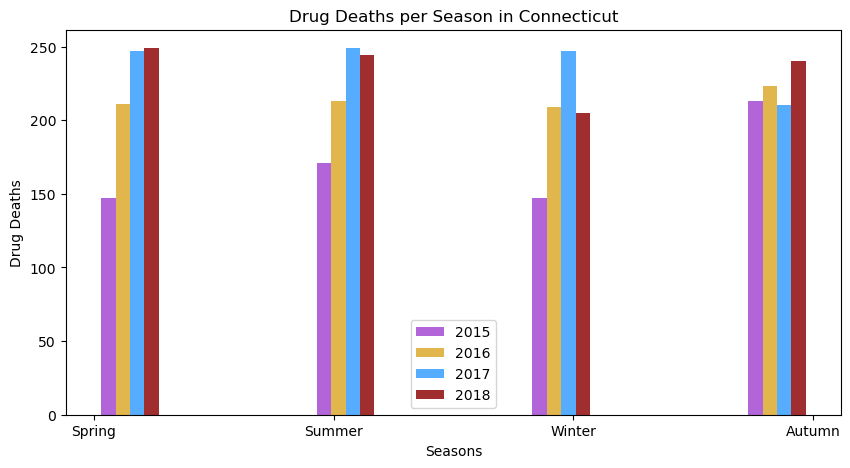

In [8]:
#assign color values
red = clr.to_rgba('darkred', alpha=0.82)
purple = clr.to_rgba('darkorchid', alpha=0.75)
blue = clr.to_rgba('dodgerblue', alpha=0.75)
gold = clr.to_rgba('goldenrod', alpha=0.8)
colors = [purple, gold, blue, red]

#plot and label histogram
plt.figure(figsize=(10,5))
plt.hist([date15DF['Season'], date16DF['Season'], date17DF['Season'], date18DF['Season']],
         label=['2015', '2016', '2017', '2018'], color = colors)
plt.title("Drug Deaths per Season in Connecticut")
plt.xlabel("Seasons")
plt.ylabel("Drug Deaths")
plt.legend(loc="best")
plt.savefig("Images/SeasonsHistogram.png")